# Dataset

[Retail Sales Dataset](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset)

**Acerca de este archivo**

* **ID de transacción:** un identificador único para cada transacción, que permite el seguimiento y la referencia.

* **Fecha:** la fecha en que se realizó la transacción, que proporciona información sobre las tendencias de ventas a lo largo del tiempo.

* **Identificación del cliente:** un identificador único para cada cliente, que permite un análisis centrado en el cliente.

* **Género:** El género del cliente (hombre/mujer), que ofrece información sobre patrones de compra basados ​​en el género.

* **Edad:** La edad del cliente, lo que facilita la segmentación y la exploración de influencias relacionadas con la edad.

* **Categoría de producto:** La categoría del producto adquirido (por ejemplo, Electrónica, Ropa, Belleza), que ayuda a comprender las preferencias de productos.

* **Cantidad:** Número de unidades del producto compradas, lo que contribuye a obtener información sobre los volúmenes de compra.

* **Precio por unidad:** El precio de una unidad del producto, que ayuda en los cálculos relacionados con el gasto total.

* **Monto total:** el valor monetario total de la transacción, que muestra el impacto financiero de cada compra.

# **Requerimientos**

----------------------------------------------
# **Paso 1 - Limpieza de Datos:**
* **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajústalo si es necesario.
* **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.
----------------------------------------------


# Librerias

In [11]:
# Standard libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaggle utility
import kagglehub

# Scikit-learn utilities for building pipelines and transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Scikit-learn for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.impute import SimpleImputer

# Scikit-learn models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR

# Scikit-learn model selection tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Scikit-learn metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc

# Scikit-learn for multiclass strategies
from sklearn.multiclass import OneVsRestClassifier

# Identificación y eliminación de valores duplicados

**Cargar datos**

In [12]:
# Download latest version
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mohammadtalib786/retail-sales-dataset/versions/1


In [13]:
# Ruta de archivo CSV
data = pd.read_csv(path + "/retail_sales_dataset.csv")

# Mostrar resultado
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [33]:
# Hacer una copia del Df original
df = data.copy()



> Copia de Dataframe para mantener el original si modificaciones



In [34]:
# Informacion de Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [35]:
# Visualizar valos nulos
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [36]:
# Contar valores únicos de cada columna
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


In [37]:
# Eliminar las columnas de ID
df = df.drop(columns=['Transaction ID', 'Customer ID'])



> Eliminamos las columnas Transation ID y Customer ID ya que son números secuenciales el cual no representa datos relevantes y no permite determinar si tenemos datos duplicados.



In [38]:
# Valores duplicados
print(f"Cantidad de datos duplicados: {df.duplicated().sum()}")

Cantidad de datos duplicados: 0


In [39]:
# Eliminar datos duplicados
df = df.drop_duplicates()
print(f"Cantidad de datos duplicados: {df.duplicated().sum()}")

Cantidad de datos duplicados: 0




> En un principio no se observa valores duplicados, pero se procedió a la ejecución del código para garantizar el proceso y completar el requerimiento.



# Verificación y ajuste de tipos de datos

In [40]:
# Tipo de Columnas del DF
df.dtypes

,0
Date,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [41]:
# Conversión 'Date' en tipo fecha
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
# Tipos de datos por columnas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
date_columns = df.select_dtypes(include=['datetime64']).columns
print(f"Columnas categóricas: {categorical_columns}")
print(f"Columnas numéricas: {numerical_columns}")
print(f"Columnas de fecha: {date_columns}")

Columnas categóricas: Index(['Gender', 'Product Category'], dtype='object')
Columnas numéricas: Index(['Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')
Columnas de fecha: Index(['Date'], dtype='object')


In [43]:
# Cnvertir la categorical_columns a tipo category
df[categorical_columns] = df[categorical_columns].astype('category')

In [44]:
# Información de Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   category      
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   category      
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 41.4 KB




> Se aprecia que contamos con tres tipos de datos que son Date, Numerical, Categorical. Y se procedió a la conversión a sus formatos correspondientes.



# Corrección de inconsistencias en valores categóricos

In [45]:
# Verificación de valores únicos de columnas categoricas
for col in categorical_columns:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()

Valores únicos en la columna 'Gender':
['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Valores únicos en la columna 'Product Category':
['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']



In [46]:
# Conteo de distribución variable Categoricas
for col in categorical_columns:
    print(f"Distribución de la columna '{col}':")
    print(df[col].value_counts())
    print()

Distribución de la columna 'Gender':
Gender
Female    510
Male      490
Name: count, dtype: int64

Distribución de la columna 'Product Category':
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64





> Después de analizar las columnas categóricas visualizamos que no presenta inconsistencias en los valores y los datos están correctamente unificados.





# Manejo de valores faltantes adecuadamente

In [48]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,Date,Age,Quantity,Price per Unit,Total Amount
count,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,NaN,13.68143,1.132734,189.681356,559.997632




> Anteriormente analizamos los valores categóricos, ahora lo valores numéricos también muestran resultados correcto, utilizando una estadística descriptiva de la misma de cada columna, como valores mínimos, máximo, estándar, etc. Y todos los datos están correctos no se aprecia valores faltantes.



# Outliers

In [ ]:
# Identificamos todas las columnas numéricas
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df, num_columns)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 0
Porcentaje de outliers: 0.00%


In [ ]:
# Filtrar el DataFrame sin outliers
df_no_outliers = df.drop(index=outlier_indices)
print(f"Tamaño del DataFrame con outliers: {df.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")

Tamaño del DataFrame con outliers: (1000, 7)
Tamaño del DataFrame sin outliers: (1000, 7)


----------------------------------------------
# **Paso 2 - Exploración de Datos:**
* **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.
----------------------------------------------

# Visualizaciones univariadas y multivariadas

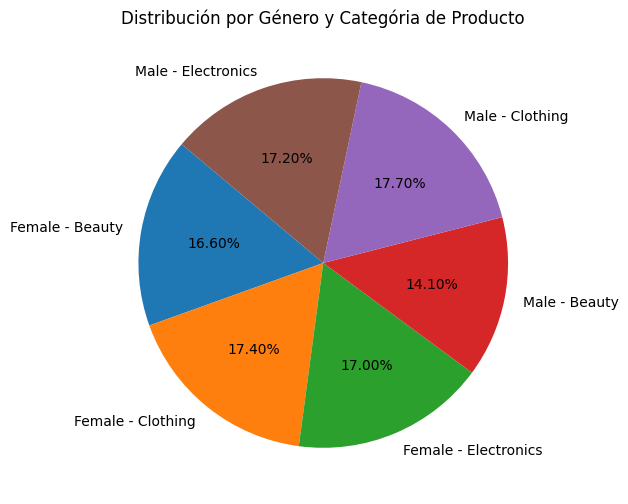

In [56]:
# Contar combinaciones de Gender y Product Category
gender_payment_counts = df.groupby(['Gender', 'Product Category'], observed=True).size().reset_index(name='Counts')

# Preparar datos para el gráfico
labels = [f"{row['Gender']} - {row['Product Category']}" for _, row in gender_payment_counts.iterrows()]
sizes = gender_payment_counts['Counts']

# Crear gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=140)
plt.title('Distribución por Género y Categória de Producto')
plt.show()



> El gráfico presentado es un gráfico de pastel que muestra la distribución porcentual de combinaciones de las categorías "Gender" (género) y "Product Category" (categoría de producto). En lineas generales las combinaciones están distribuidas de forma relativamente uniforme, con ligeras variaciones.El gráfico ayuda a identificar patrones en las preferencias de género por tipo de producto, siendo útil para análisis de marketing y ventas.



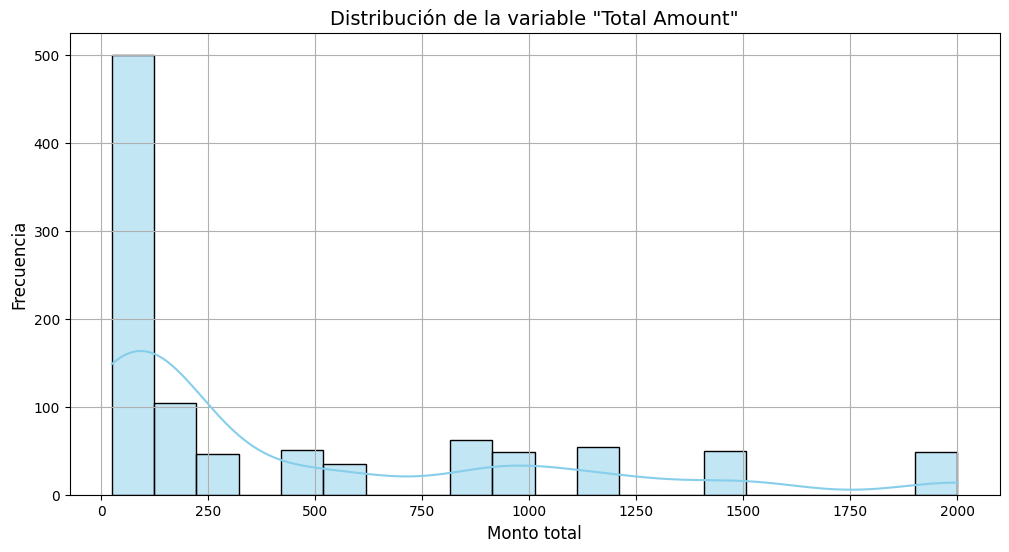

In [58]:
# Histograma: Distribución de Monto total

plt.figure(figsize=(12, 6))
sns.histplot(df['Total Amount'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable "Total Amount"', fontsize=14)
plt.xlabel('Monto total', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()



> El histograma que muestra la distribución de la variable "Total Amount" (Monto total). Se observa una alta frecuencia para montos cercanos a 0-250, indicando que la mayoría de las transacciones tienen montos bajos.La línea azul muestra la densidad estimada de la distribución, destacando la mayor concentración de datos en los valores bajos.Esto podría ser útil para estrategias de análisis financiero



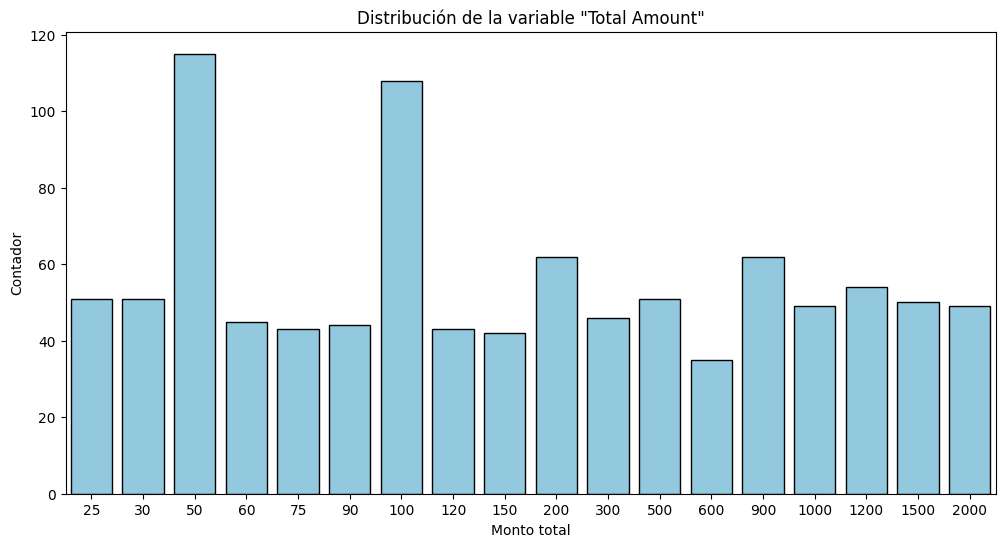

In [59]:
# Gráficos de barras: Distribución de Monto total

plt.figure(figsize=(12, 6))
sns.countplot(x='Total Amount', data=df, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable "Total Amount"')
plt.xlabel('Monto total')
plt.ylabel('Contador')
plt.show()



> En el gráfico de Barra analizamos nuevamente el "Total Amount" para ver la distribución cada una de las variantes de monto y la cantidad de transacción en cada valor. Se observa una alta frecuencia para montos bajos pero todo muy uniforme sin contar el monto 50 y 100 los cuales tienen cantidades de transacción más altos que los demás montos.



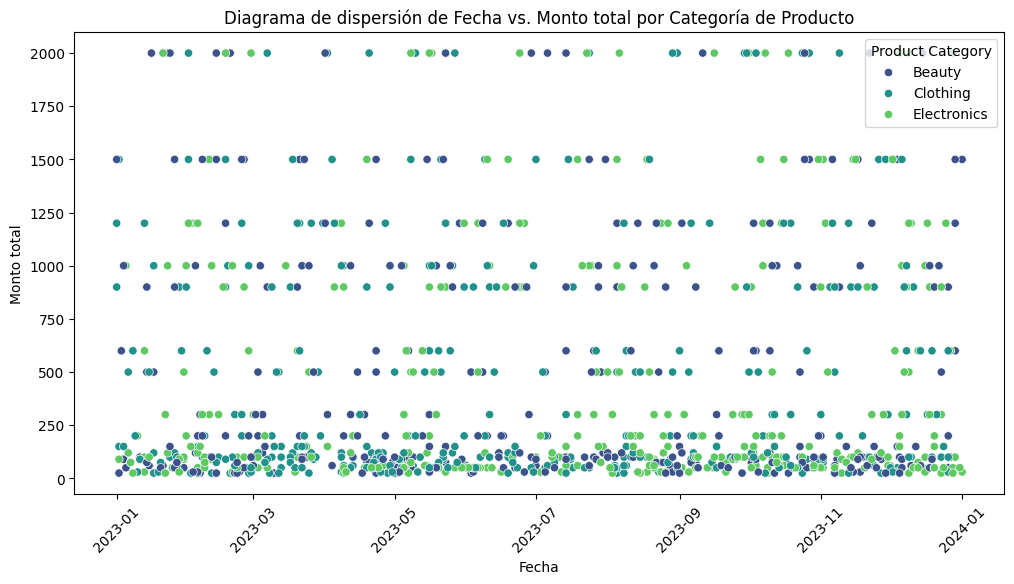

In [60]:
# Diagramas de dispersión de Fecha vs. Monto total por Categoría de Producto

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Total Amount', hue='Product Category', data=df, palette='viridis')
plt.title('Diagrama de dispersión de Fecha vs. Monto total por Categoría de Producto')
plt.xlabel('Fecha')
plt.ylabel('Monto total')
plt.tick_params(axis='x', rotation=45)
plt.show()



> Se puede observar si hay alguna tendencia en cómo el Monto Total de ventas varía a lo largo del tiempo de análisis y Categoría de Producto. La dispersión de los puntos puede indicar la tendencia de venta en montos más bajos a lo largo del tiempo.


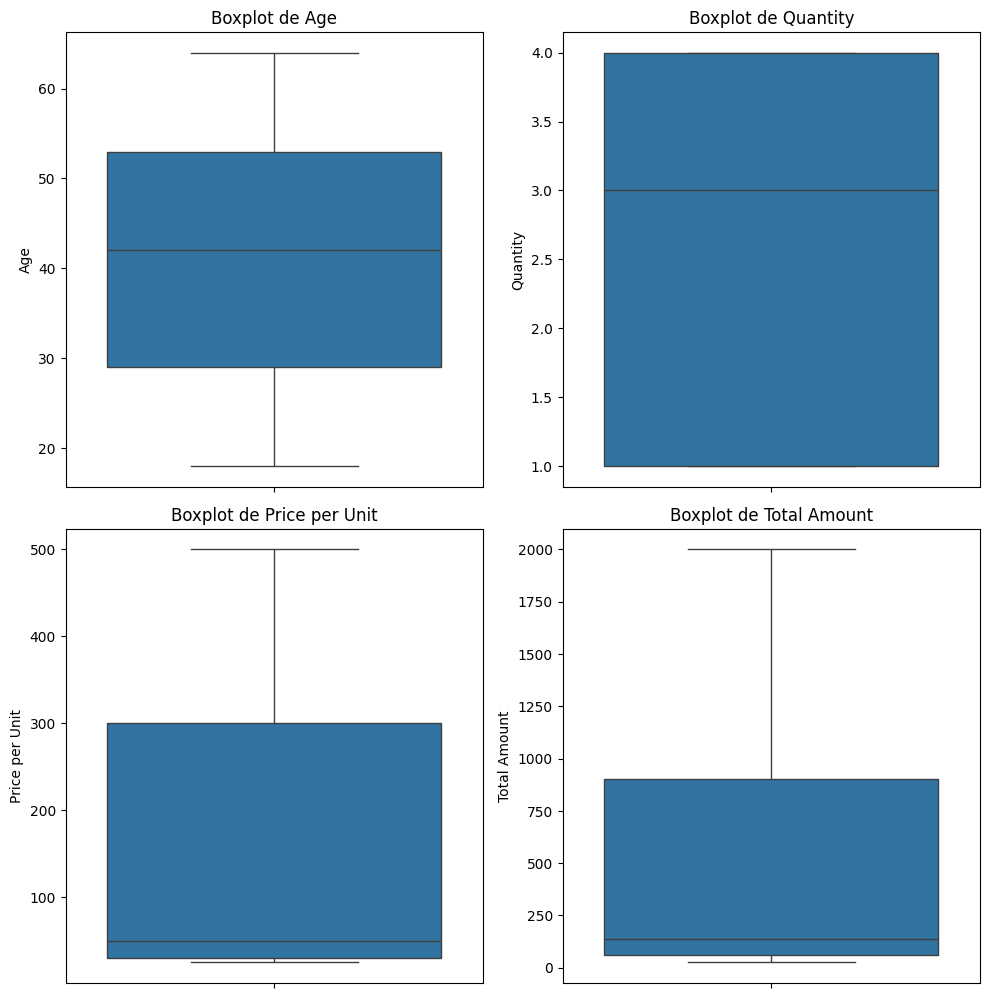

In [61]:
# Detectar outliers con boxplots para variables numéricas

plt.figure(figsize=(10, 15))
for i, col in enumerate(df[numerical_columns], start=1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



> Gráfico de Boxplot de valores numéricos.
* **Boxplot de Age:** Este gráfico muestra la distribución de los valores de edad. Una distribución bastante simétrica sin datos atípicos.
* **Boxplot de Quantity:** Este gráfico muestra la distribución de los valores de cantidad. Al igual que en el boxplot de edad, la caja central representa los valores centrales, la línea horizontal es la mediana.
* **Boxplot de Price per Unit:** Este gráfico muestra la distribución de los valores de precio por unidad. Sigue la misma interpretación que los boxplots anteriores, solo que la media está muy debajo y el bigote superior muy pronunciado.
* **Boxplot de Total Amount:** Este gráfico muestra la distribución de los valores de monto total. Nuevamente, la caja central representa los valores centrales, la línea horizontal es la mediana, y los bigotes se extienden a los valores mínimo y máximo.




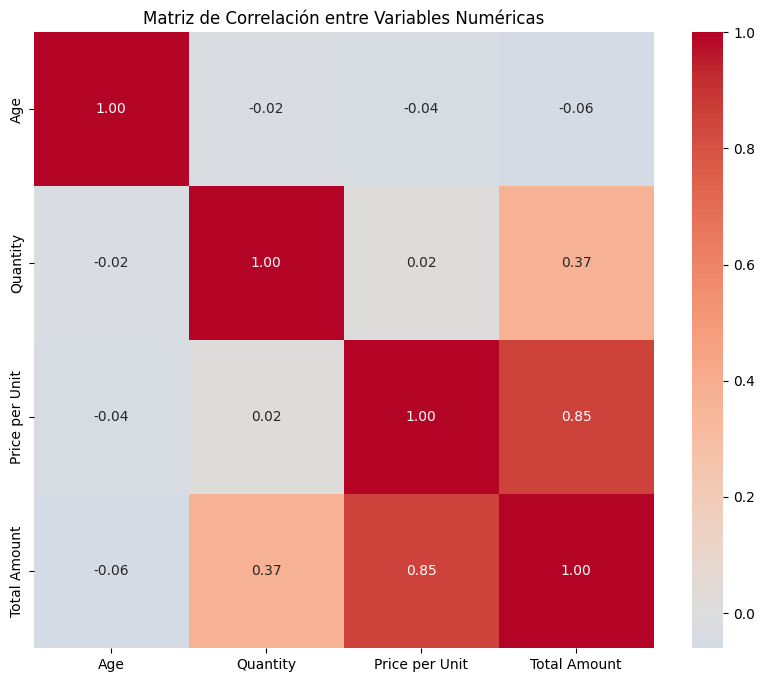

In [62]:
# Correlación de los datos numéricos

correlation_matrix = df[numerical_columns].corr()
#print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()



> Los colores más oscuros indican correlaciones positivas fuertes, y colores más claros indican correlaciones negativas fuertes. Tenemos datos superior al 0.5 que indica fuerte correlación positiva y datos inferiores a 0.5 que indica fuerte correlación negativa eje: Price per Unit (Positivo) y Age (Negativo)



# Estadísticas descriptivas

In [63]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,Date,Age,Quantity,Price per Unit,Total Amount
count,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,NaN,13.68143,1.132734,189.681356,559.997632


In [64]:
# Calcular la moda
moda = df[numerical_columns].mode().iloc[0]

# Calcular el rango
rango = df[numerical_columns].max() - df[numerical_columns].min()

# Mostrar los resultados
print("\nMedidas de tendencia central y dispersión adicionales:")
print(f"\nModa:\n{moda}")
print(f"\nRango:\n{rango}")


Medidas de tendencia central y dispersión adicionales:

Moda:
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64

Rango:
Age                 46
Quantity             3
Price per Unit     475
Total Amount      1975
dtype: int64




> Para este requerimiento se procedió a utilizar el método describe() ya que realiza gran parte de lo requerido y para concluir realizamos cálculos para completar las demás medidas requeridos



----------------------------------------------
# **Paso 3 - Implementación de Modelos:**
* **Modelos de Regresión:** Implementa modelos de Decision Tree Regressor y Random Forest Regressor.
* **Optimización de Modelos:** Utiliza GridSearchCV para optimizar los hiperparámetros de los modelos.
* **Evaluación de Modelos:** Evalúa los modelos utilizando métricas como MSE, RMSE, y R².
* **Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.
----------------------------------------------

# Modelado con datos sin transformar

In [87]:
df[numerical_columns].columns.tolist()

['Age', 'Quantity', 'Price per Unit', 'Total Amount']



> Determinar solo la columna numérica para modelar en base al dato original para tener un primer modelo de comparación



In [88]:
# División de los datos en características y variable objetivo
X = df[['Age', 'Quantity', 'Price per Unit']]
y = df['Total Amount']

# División en conjunto de entrenamiento (60%), validación (20%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 600
Tamaño del conjunto de validación: 200
Tamaño del conjunto de prueba: 200




> Hacer la división de los datos numéricos en características y variable objetivo y dividir en conjunto de entrenamiento, validación y prueba.



In [89]:
# Modelo: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicciones
y_val_pred_dt = dt_model.predict(X_val)

# Métricas de evaluación
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)

print("Resultados Decision Tree Regressor:")
print(f"MSE (Validación): {mse_dt}")
print(f"RMSE (Validación): {rmse_dt}")
print(f"R² (Validación): {r2_dt}")

Resultados Decision Tree Regressor:
MSE (Validación): 0.0
RMSE (Validación): 0.0
R² (Validación): 1.0




> Para el modelo de Decision Tree Regressor con esos datos originales tenemos una resultado de R²: 1.0 o más bien un resultado óptimo.



In [90]:
# Modelo: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predicciones
y_val_pred_rf = rf_model.predict(X_val)

# Métricas de evaluación
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

print("Resultados Random Forest Regressor:")
print(f"MSE (Validación): {mse_rf}")
print(f"RMSE (Validación): {rmse_rf}")
print(f"R² (Validación): {r2_rf}")

Resultados Random Forest Regressor:
MSE (Validación): 0.0
RMSE (Validación): 0.0
R² (Validación): 1.0




> Para el modelo de Random Forest Regressor con esos datos originales tenemos una resultado de R²: 1.0 o más bien un resultado óptimo.



In [91]:
# Definimos los hiperparámetros a optimizar
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=param_grid_dt, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Mejor modelo y parámetros
best_dt_model = grid_dt.best_estimator_
print("Mejores hiperparámetros para Decision Tree Regressor:", grid_dt.best_params_)

Mejores hiperparámetros para Decision Tree Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}




> Para el modelo de Decisión Tree Regressor con hiperparámetros esa es la que determino como mejor métrica.



In [92]:
# Definimos los hiperparámetros a optimizar
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# GridSearchCV
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Mejor modelo y parámetros
best_rf_model = grid_rf.best_estimator_
print("Mejores hiperparámetros para Random Forest Regressor:", grid_rf.best_params_)


Mejores hiperparámetros para Random Forest Regressor: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}




> Para el modelo de Random Forest Regressor con hiperparámetros esa es la que determino como mejor métrica.



In [93]:
# Predicciones con el modelo optimizado
y_val_pred_dt_opt = best_dt_model.predict(X_val)
y_test_pred_dt_opt = best_dt_model.predict(X_test)

# Métricas en validación
mse_val_dt = mean_squared_error(y_val, y_val_pred_dt_opt)
rmse_val_dt = np.sqrt(mse_val_dt)
r2_val_dt = r2_score(y_val, y_val_pred_dt_opt)

# Métricas en prueba
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt_opt)
rmse_test_dt = np.sqrt(mse_test_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt_opt)

print("\nEvaluación Decision Tree Regressor:")
print(f"MSE  (Validación): {mse_val_dt},   MSE (Prueba): {mse_test_dt}")
print(f"RMSE (Validación): {rmse_val_dt},  RMSE (Prueba): {rmse_test_dt}")
print(f"R²   (Validación): {r2_val_dt},    R² (Prueba): {r2_test_dt}")


Evaluación Decision Tree Regressor:
MSE  (Validación): 0.0,   MSE (Prueba): 0.0
RMSE (Validación): 0.0,  RMSE (Prueba): 0.0
R²   (Validación): 1.0,    R² (Prueba): 1.0




> Evaluación Decision Tree Regressor Validación vs Prueba



In [94]:
# Predicciones con el modelo optimizado
y_val_pred_rf_opt = best_rf_model.predict(X_val)
y_test_pred_rf_opt = best_rf_model.predict(X_test)

# Métricas en validación
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf_opt)
rmse_val_rf = np.sqrt(mse_val_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf_opt)

# Métricas en prueba
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf_opt)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf_opt)

print("\nEvaluación Random Forest Regressor:")
print(f"MSE  (Validación): {mse_val_rf},  MSE (Prueba): {mse_test_rf}")
print(f"RMSE (Validación): {rmse_val_rf}, RMSE (Prueba): {rmse_test_rf}")
print(f"R²   (Validación): {r2_val_rf},   R² (Prueba): {r2_test_rf}")


Evaluación Random Forest Regressor:
MSE  (Validación): 0.0,  MSE (Prueba): 0.0
RMSE (Validación): 0.0, RMSE (Prueba): 0.0
R²   (Validación): 1.0,   R² (Prueba): 1.0




> Evaluación Random Forest Regressor Validación vs Prueba



In [95]:
comparison = pd.DataFrame({
    'Modelo': ['Decision Tree', 'Random Forest'],
    'MSE_Validación': [mse_val_dt, mse_val_rf],
    'RMSE_Validación': [rmse_val_dt, rmse_val_rf],
    'R²_Validación': [r2_val_dt, r2_val_rf],
    'MSE_Prueba': [mse_test_dt, mse_test_rf],
    'RMSE_Prueba': [rmse_test_dt, rmse_test_rf],
    'R²_Prueba': [r2_test_dt, r2_test_rf]
})

print(comparison)

          Modelo  MSE_Validación  RMSE_Validación  R²_Validación  MSE_Prueba  \
0  Decision Tree             0.0              0.0            1.0         0.0   
1  Random Forest             0.0              0.0            1.0         0.0   

   RMSE_Prueba  R²_Prueba  
0          0.0        1.0  
1          0.0        1.0  




> Comparación de los dos modelos





> **Para el modelado inicial utilizando los datos numéricos originales, los resultados obtenidos muestran que tanto el Decision Tree Regressor como el Random Forest Regressor alcanzaron un R² de 1.00 en los conjuntos de validación y prueba. Esto indica que ambos modelos lograron interpretar perfectamente la relación entre las variables predictoras y la variable objetivo, ajustándose completamente a los datos.**



#Modelado con tranformación

In [98]:
# Datos categoricos y datos numerios
print(df[categorical_columns].columns.tolist())
print(df[numerical_columns].columns.tolist())

['Gender', 'Product Category']
['Age', 'Quantity', 'Price per Unit', 'Total Amount']




> Determinar las columnas numéricas y categóricas para modelar en base a esos datos



In [99]:
# Identificación de columnas categóricas y numéricas
categoricas = ['Gender', 'Product Category']
numericas = ['Age', 'Quantity', 'Price per Unit']

# División de los datos en características y variable objetivo
X = df[categoricas + numericas]
y = df['Total Amount']

# División en conjunto de entrenamiento (60%), validación (20%) y prueba (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 600
Tamaño del conjunto de validación: 200
Tamaño del conjunto de prueba: 200




> Hacer la división de los datos numéricos y categóricos en características y variable objetivo y dividir en conjunto de entrenamiento, validación y prueba.



In [102]:
# Crear los transformadores para cada tipo de dato
transformador_categorico = OneHotEncoder(sparse_output=False, drop='first')
transformador_numerico = StandardScaler()

# Crear el preprocesador usando ColumnTransformer
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', transformador_categorico, categoricas),
        ('num', transformador_numerico, numericas)
    ]
)

# Aplicar el preprocesador a los datos de entrenamiento, validación y prueba
X_train_transf = preprocesador.fit_transform(X_train)
X_val_transf = preprocesador.transform(X_val)
X_test_transf = preprocesador.transform(X_test)

# Imprimir las formas de los conjuntos transformados
print(f"Dimensión del conjunto de entrenamiento transformado: {X_train_transf.shape}")
print(f"Dimensión del conjunto de validación transformado: {X_val_transf.shape}")
print(f"Dimensión del conjunto de prueba transformado: {X_test_transf.shape}")

Dimensión del conjunto de entrenamiento transformado: (600, 6)
Dimensión del conjunto de validación transformado: (200, 6)
Dimensión del conjunto de prueba transformado: (200, 6)




> Transformar los datos categóricos con OneHotEcoder y los numéricos el aplicamos un StandarScaler.



In [105]:
# Inicializar los modelos
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42, n_estimators=100)

# Entrenar Decision Tree Regressor
decision_tree.fit(X_train_transf, y_train)
y_pred_tree = decision_tree.predict(X_val_transf)

# Entrenar Random Forest Regressor
random_forest.fit(X_train_transf, y_train)
y_pred_forest = random_forest.predict(X_val_transf)

# Evaluación de métricas
def evaluar_modelo(y_val, y_pred, nombre_modelo):
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    print(f"Resultados para {nombre_modelo}:")
    print(f" - MSE: {mse:.2f}")
    print(f" - RMSE: {rmse:.2f}")
    print(f" - R²: {r2:.2f}\n")

# Evaluar Decision Tree Regressor
evaluar_modelo(y_val, y_pred_tree, "Decision Tree Regressor")

# Evaluar Random Forest Regressor
evaluar_modelo(y_val, y_pred_forest, "Random Forest Regressor")

Resultados para Decision Tree Regressor:
 - MSE: 0.00
 - RMSE: 0.00
 - R²: 1.00

Resultados para Random Forest Regressor:
 - MSE: 0.00
 - RMSE: 0.00
 - R²: 1.00





> Aplicamos el modelado para Decision Tree Regressor y Random Forest Regressor obteniendo el mismo resultado con los datos originales con un R²: 1.00 para ambos modelos



In [108]:
# Parámetros para el Decision Tree Regressor
param_grid_tree = {
    'criterion': ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parámetros para el Random Forest Regressor
param_grid_forest = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar los modelos
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# GridSearchCV para optimizar el Decision Tree Regressor
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(X_train_transf, y_train)

# GridSearchCV para optimizar el Random Forest Regressor
grid_search_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_forest, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_forest.fit(X_train_transf, y_train)

# Resultados de la optimización
print("Mejores hiperparámetros para Decision Tree Regressor:", grid_search_tree.best_params_)
print("Mejores hiperparámetros para Random Forest Regressor:", grid_search_forest.best_params_)

Mejores hiperparámetros para Decision Tree Regressor: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejores hiperparámetros para Random Forest Regressor: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}




> Para los modelos de Decision Tree Regressor y Random Forest Regressor con hiperparámetros esa son las que determino como mejor métrica.


In [109]:
# Evaluar los modelos optimizados en el conjunto de prueba
def evaluar_modelo_optimizado(y_test, y_pred, nombre_modelo):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Resultados para {nombre_modelo}:")
    print(f" - MSE: {mse:.2f}")
    print(f" - RMSE: {rmse:.2f}")
    print(f" - R²: {r2:.2f}\n")

# Predecir y evaluar Decision Tree optimizado en el conjunto de prueba
y_pred_tree_opt = grid_search_tree.predict(X_test_transf)
evaluar_modelo_optimizado(y_test, y_pred_tree_opt, "Decision Tree Regressor Optimizado")

# Predecir y evaluar Random Forest optimizado en el conjunto de prueba
y_pred_forest_opt = grid_search_forest.predict(X_test_transf)
evaluar_modelo_optimizado(y_test, y_pred_forest_opt, "Random Forest Regressor Optimizado")

Resultados para Decision Tree Regressor Optimizado:
 - MSE: 0.00
 - RMSE: 0.00
 - R²: 1.00

Resultados para Random Forest Regressor Optimizado:
 - MSE: 0.00
 - RMSE: 0.00
 - R²: 1.00



Evaluación de Decision Tree Regressor y Random Forest Regressor Prueba



> **El modelado de los datos arroja como resulta idéntico en ambos análisis realizados, con un resultado de R² de 1.00 en Decision Tree Regressor y Random Forest Regressor. Sin embargo, un R² de 1.00 puede sugerir que los modelos están sobreajustados a los datos de entrenamiento, especialmente si los datos son limitados o presentan patrones específicos que los modelos capturan perfectamente. Este comportamiento es común en modelos como árboles de decisión o bosques aleatorios.**

